In [1]:
# accessing to data 

path_training = 'BelgiumTSC_Training\Training'
path_testing = 'BelgiumTSC_Testing\Testing'

nbr_class = 62 # len(next(walk(path_training))[1])  counting the number of classes 
print('number of classes : ', nbr_class)

#-----------------------------------------------------------------------------

# resol is the format for the images that we want for convenience

resol = (30,30)

number of classes :  62


In [2]:
from glob2 import glob

def names (path) : 

    # Retrieving the names of all files finishing with .ppm or .jpeg in the mentionned Directory 
    # returns a list of string 

    names = glob(path + "\\**\\*.ppm") + glob(path + "\\**\\*.jpeg")
    return names

#-----------------------------------------------------------------------------

training_names = names(path_training) 
testing_names = names(path_testing)
print("number of images in the training folder : ", len(training_names))
print("number of images in the testing folder : ", len(testing_names))

number of images in the training folder :  4575
number of images in the testing folder :  2520


In [3]:
from PIL import Image 
from os.path import dirname, realpath, basename
from numpy import asarray, append, array
from matplotlib.pyplot import show, figure, imshow

# We'll store Images and categories in arrays for convenience 

X_train = []
y_train = []

X_test = []
y_test = [] 

#-----------------------------------------------------------------------------

def store_images(names, X_array, y_array) : 

    # We'll process each image 

    for i in range(len(names)):

        # We store the category 

        # dirname(realpath()) gives the current location of the name that we process 
        # basename gives the name of the upper directory which is the category that we must predict 
        y_array.append((float(basename(dirname(realpath(names[i]))))))

        # We open the image 
        img = Image.open(names[i])

        # We resize the image 
        img = img.resize(resol)

        # We store the image 
        img = asarray(img)

        X_array.append(img)

#-----------------------------------------------------------------------------

store_images(training_names, X_train, y_train)
store_images(testing_names, X_test, y_test)

X_test = array(X_test)
X_train = array(X_train)
y_test = array(y_test)
y_train = array(y_train)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)

print("Shape of X_train : ", X_test.shape)
print("Shape of y_train : ", y_test.shape)

Shape of X_train :  (4575, 30, 30, 3)
Shape of y_train :  (4575,)
Shape of X_train :  (2520, 30, 30, 3)
Shape of y_train :  (2520,)


Number of each sign in the train set : 

[ 15 110  13  15  15  11  18 157  27  18  21   7  18  90  43   9   9  79
  81 231  42  43 375  15  48  42   6  18 125  33  37  63 316  12  46  60
  18  98 285 196 242 148  35  30  48  74  44 147  11  12  15  27  27 199
 118  12  95  78  15  42   9 282]

Total of signs :  4575

Number of each sign in the test set : 

[  6  27   7   6  12   3   6  90  12   0  28   0   3  39  15   0  12 183
 122 163   3  45  61  15  13   3   0   9  51  28  37  86 422   0   9 154
   0  31 213  99  48  11   9   6   3  84   6  31   0   3   0   3   0  24
  48  15  33  41   9  17  11 105]

Total of signs :  2520


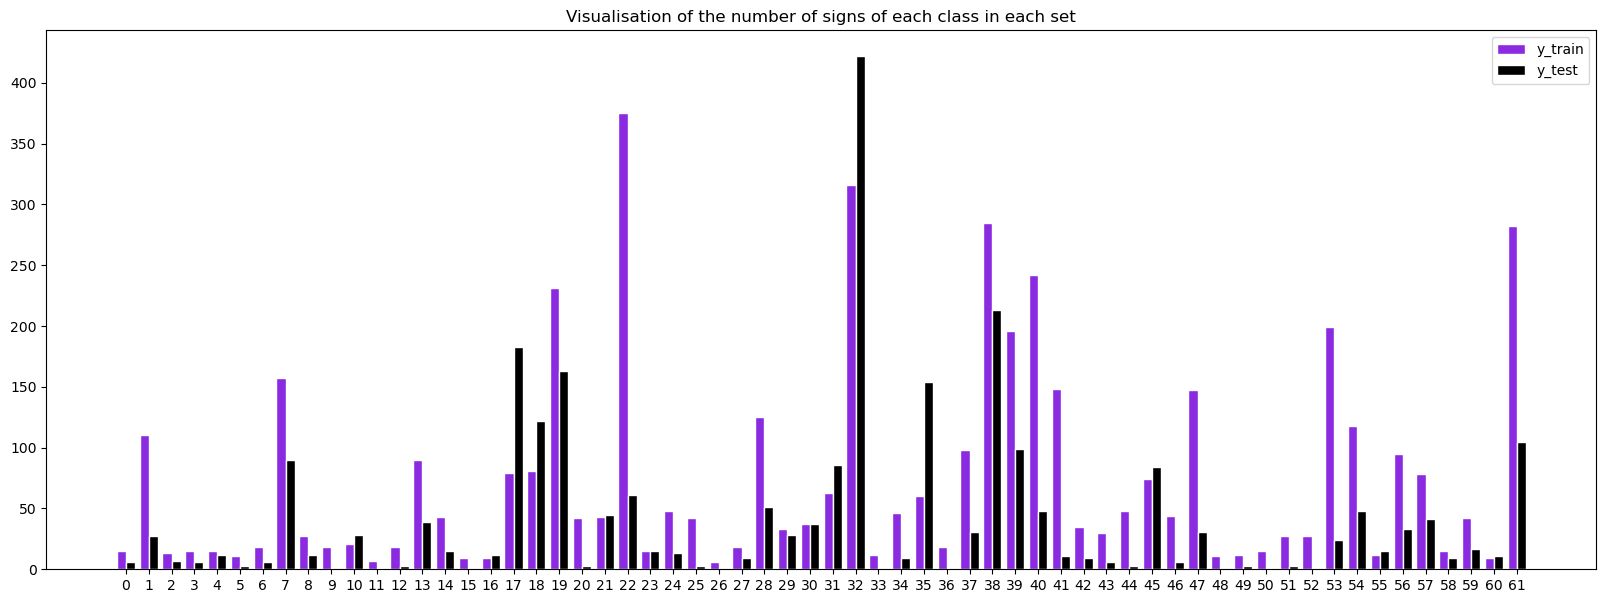

In [4]:
from numpy import zeros, arange
from matplotlib.pyplot import subplots, title, xticks, legend, show

# This cell is about visualisation of the dataset 

a = zeros(nbr_class, dtype=int)
b = zeros(nbr_class, dtype=int)

for i in range(nbr_class) :
    a[i] = int((y_train == i).sum())  # Number of images of class i in the Training set
    b[i] = int((y_test == i).sum())   # Number of images of class i in the Test set 

print("Number of each sign in the train set : ")
print()
print(a)
print()
print("Total of signs : ", a.sum())
print()

print("Number of each sign in the test set : ")
print()
print(b)
print()
print("Total of signs : ", b.sum())

# We plot an histo showing how many signs of each class we have in each set 

fig, ax = subplots(figsize = (20, 7))
bins = [x + 0.5 for x in range(-1, nbr_class)]
ax.hist([y_train, y_test], range = (0, nbr_class-1), bins=bins, edgecolor = 'white', color = ['blueviolet','black'], label = ['y_train', 'y_test'])
title("Visualisation of the number of signs of each class in each set")
xticks(arange(nbr_class))
legend()
show()

In [5]:
from keras.utils import to_categorical

# We put our results to categorical 

# talk Some explanations needed ...

y_train = to_categorical(y_train, nbr_class)
y_test = to_categorical(y_test, nbr_class)

print("Shape of y_train with second method : ", y_train.shape)
print("Shape of y_test with second method : ", y_test.shape)

Shape of y_train with second method :  (4575, 62)
Shape of y_test with second method :  (2520, 62)


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# We construct our model using CNN architecture (AlexNet, LeNet)

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]) )
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(nbr_class, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# We train here the model with the second method of augmentation 

eps = 15 # The number of time we want the model to train on the entire training_set

mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
anc = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=eps, callbacks=mycallbacks)
#added aug.flow to (X_train, y_train) to do data augmentation

# talk : aug.flow ? 

Epoch 1/15
143/143 [==============================] - 16s 104ms/step - loss: 4.8079 - accuracy: 0.2750 - val_loss: 2.0755 - val_accuracy: 0.5373
Epoch 2/15
143/143 [==============================] - 14s 101ms/step - loss: 1.9927 - accuracy: 0.5569 - val_loss: 1.4409 - val_accuracy: 0.7345
Epoch 3/15
143/143 [==============================] - 16s 114ms/step - loss: 1.4543 - accuracy: 0.6645 - val_loss: 1.0921 - val_accuracy: 0.7440
Epoch 4/15
143/143 [==============================] - 15s 103ms/step - loss: 1.1563 - accuracy: 0.7180 - val_loss: 0.7585 - val_accuracy: 0.8159
Epoch 5/15
143/143 [==============================] - 13s 93ms/step - loss: 0.9453 - accuracy: 0.7467 - val_loss: 0.6545 - val_accuracy: 0.8421
Epoch 6/15
143/143 [==============================] - 14s 95ms/step - loss: 0.8407 - accuracy: 0.7714 - val_loss: 0.6187 - val_accuracy: 0.8548
Epoch 7/15
143/143 [==============================] - 13s 92ms/step - loss: 0.7903 - accuracy: 0.7869 - val_loss: 0.5995 - val_accur

In [8]:
# Here's a function that will give the score that we can see on kaggle 

true = y_test.argmax(axis=1)

print(true)
print(len(true))

predict = model.predict(X_test).argmax(axis=1)

print(predict)
print(len(predict))

right = 0 

for i in range(len(true)) : 
    if predict[i] == true[i] :  
        right += 1 

print("Number of right : ", right)
print("Number of elements : ", len(true))

print("Ratio : ", right/len(true))

[ 0  0  0 ... 61 61 61]
2520
79/79 [==============================] - 2s 20ms/step
[ 1  0  0 ... 61 61 61]
2520
Number of right :  2318
Number of elements :  2520
Ratio :  0.9198412698412698


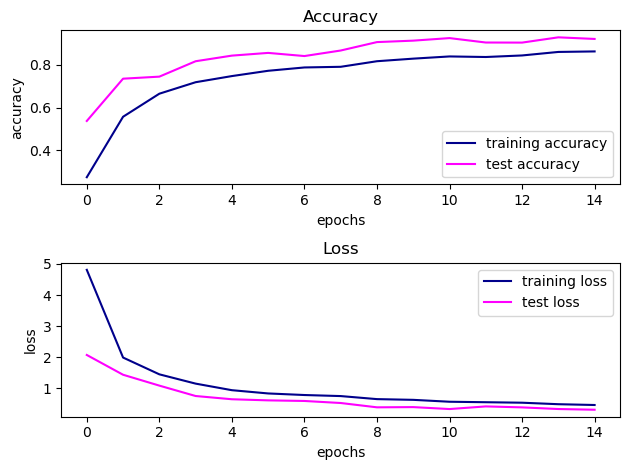

In [9]:
from matplotlib.pyplot import subplot, plot, xlabel, ylabel, tight_layout

# Plot of performances 

figure()

subplot(2, 1, 1)
plot(anc.history['accuracy'], label='training accuracy', color = 'darkblue')
plot(anc.history['val_accuracy'], label='test accuracy', color = 'magenta')
title('Accuracy')
xlabel('epochs')
ylabel('accuracy')
legend()

subplot(2, 1, 2)
plot(anc.history['loss'], label='training loss', color = 'darkblue')
plot(anc.history['val_loss'], label='test loss', color = 'magenta')
title('Loss')
xlabel('epochs')
ylabel('loss')
legend()

tight_layout()
show()

In [10]:
from os import listdir

# We store all of the images from the kaggle folder in an array 
# recall that target has been defined above 

images = [] 
names = []

# get the path/directory
folder_dir = 'eval_kaggle1'

for image in listdir(folder_dir):
    # check if the image ends with ppm
    if (image.endswith(".ppm")):
        img = Image.open(folder_dir + '/' + image)
        img = img.resize(resol) # (30,30) as an example 
        img = asarray(img)
        images.append(img) 
        names.append(image.replace('.ppm',''))

images = array(images)

print(images.shape)
print(type(images))

(202, 30, 30, 3)
<class 'numpy.ndarray'>


In [11]:
# We print there the predictions for the dataset of kaggle 

print("[INFO] evaluating network...")

predictions = model.predict(images).argmax(axis=1)
print(predictions)
print(len(predictions))

[INFO] evaluating network...
7/7 [==============================] - 0s 15ms/step
[ 8 47 22 61 19 39 21  5 21 31 45 40 38 19 17 60 44 54 40 38 44 56 38 22
 21 20 38 38 17  1 38 19 21 61 38 47  4  7 18 61 24 17 28  1 61  1 28 13
 38 56 43 31 22 61  8 38 31  7 20 19 38 19 17 38 38 38 46 40 38 61 17 38
 38 28  9 38 38  7 29 38  9 39  1 38 38 28 47 54 38 38 54 14 21 12  7 47
 33 61 38 38 47  8 38 38 30 22 38  4 61 59 19 18 34 33 38 19 18 14  1 38
 40 13 45 12 37 47 17 38 53 61 19 24 12 21 32 54 38 38 37 38 29 22 38 38
 38 47 59 59 18  7 38 47 39 41 37 38 29 46 37 38 13  9 10 38 54 47 31 39
  1 40 38 19 40 47 38  3 21 38 39 61  1 18 38 21 38 13 39 45 38  6  1 38
 28 56 38 38  4 39 31 56  7 38]
202


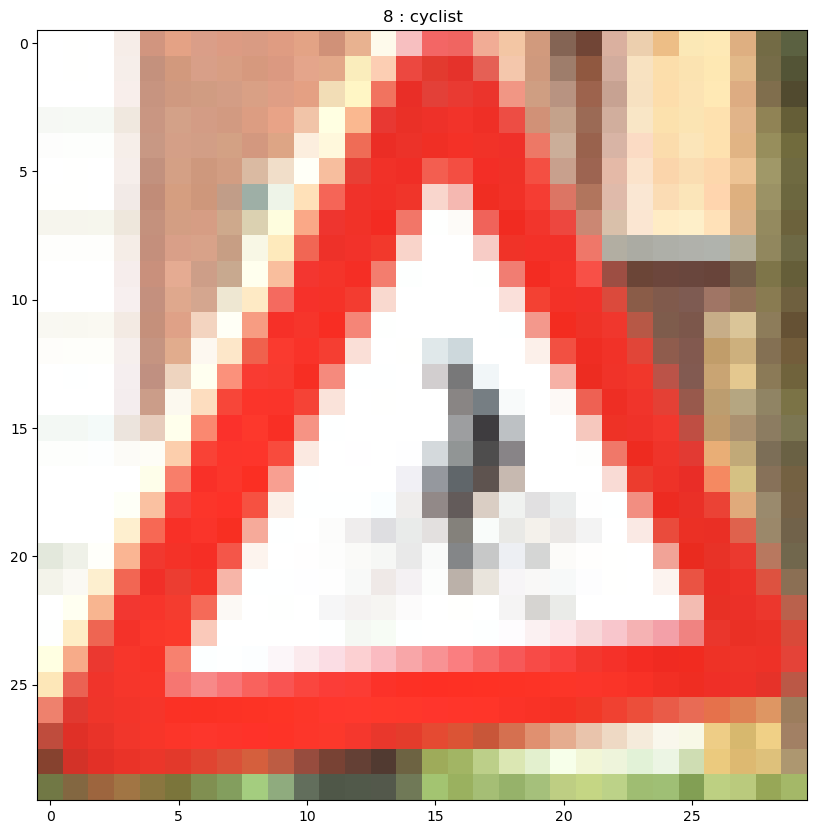

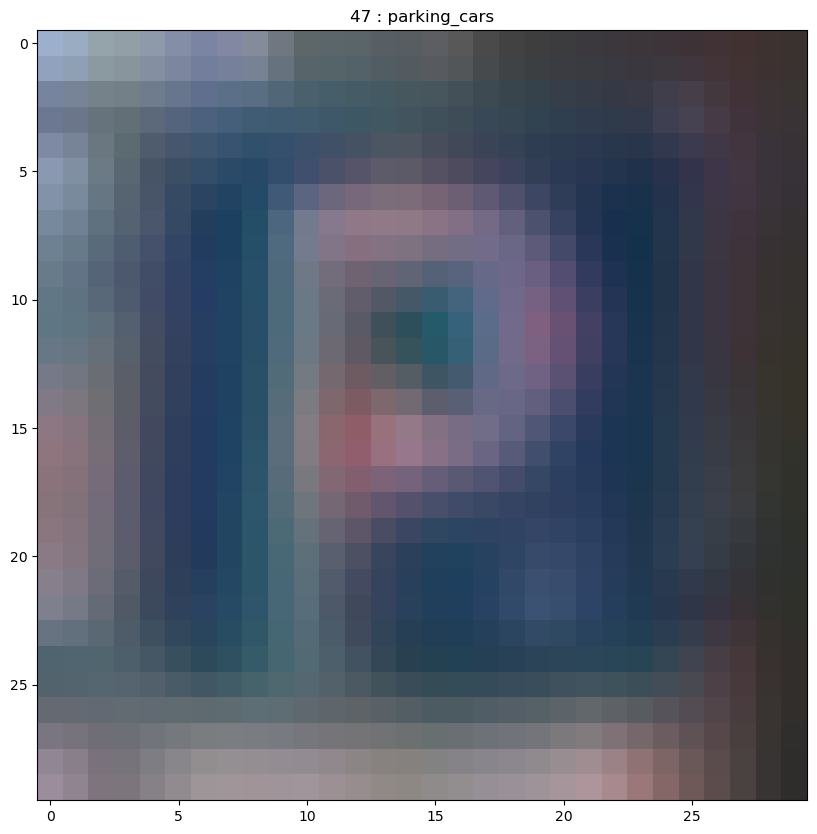

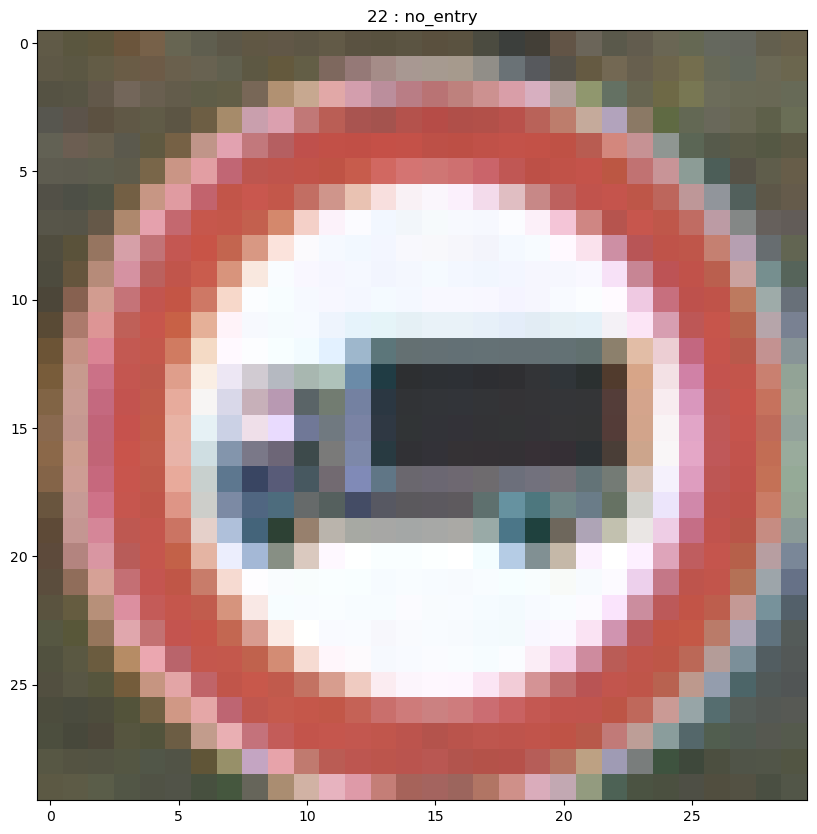

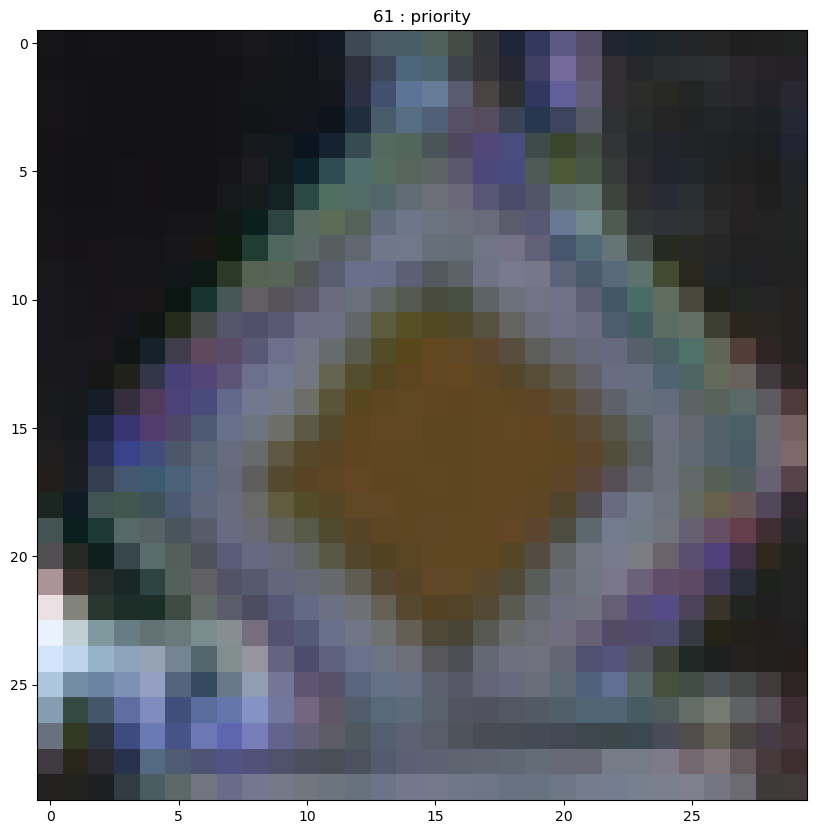

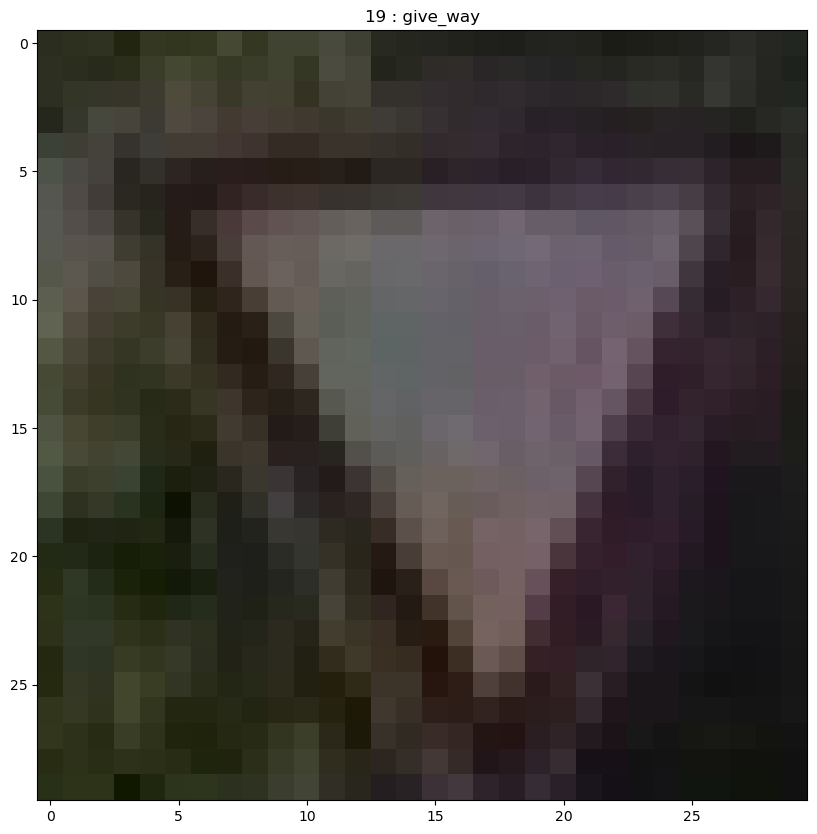

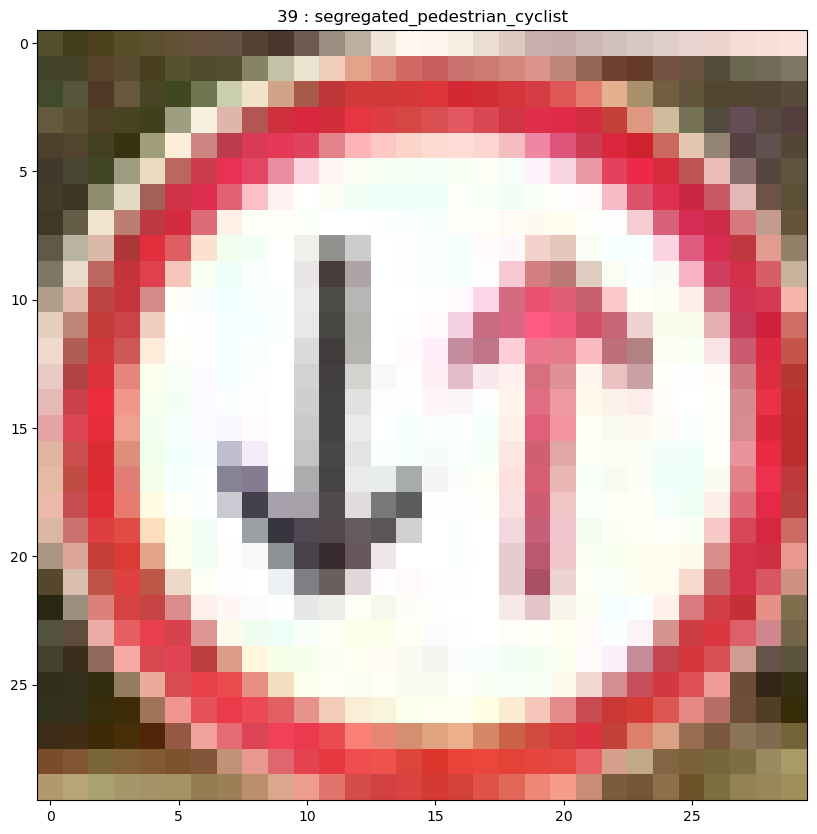

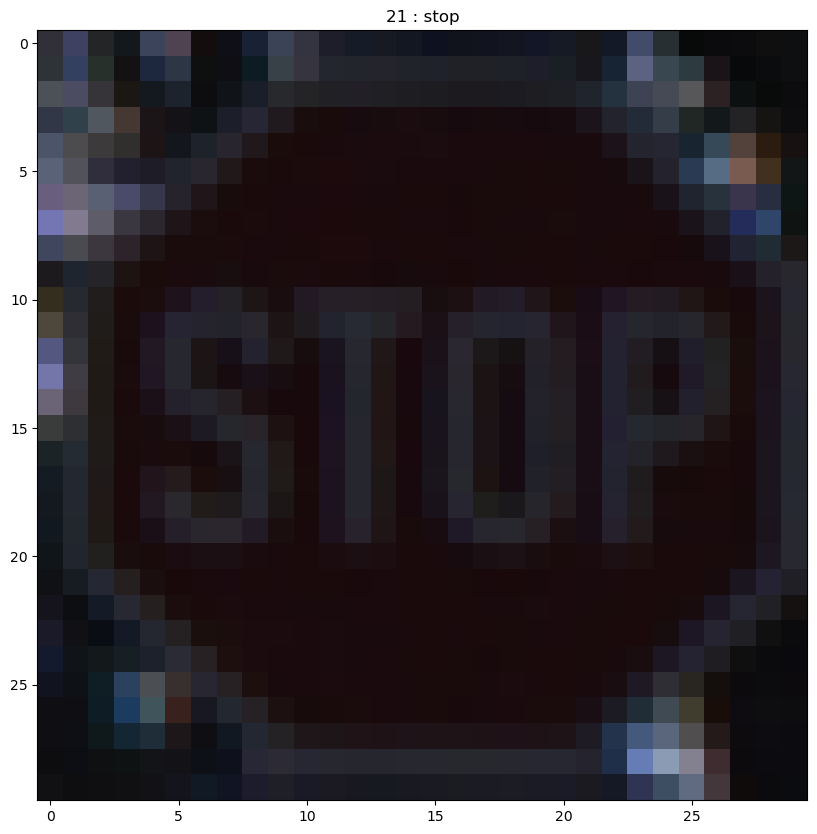

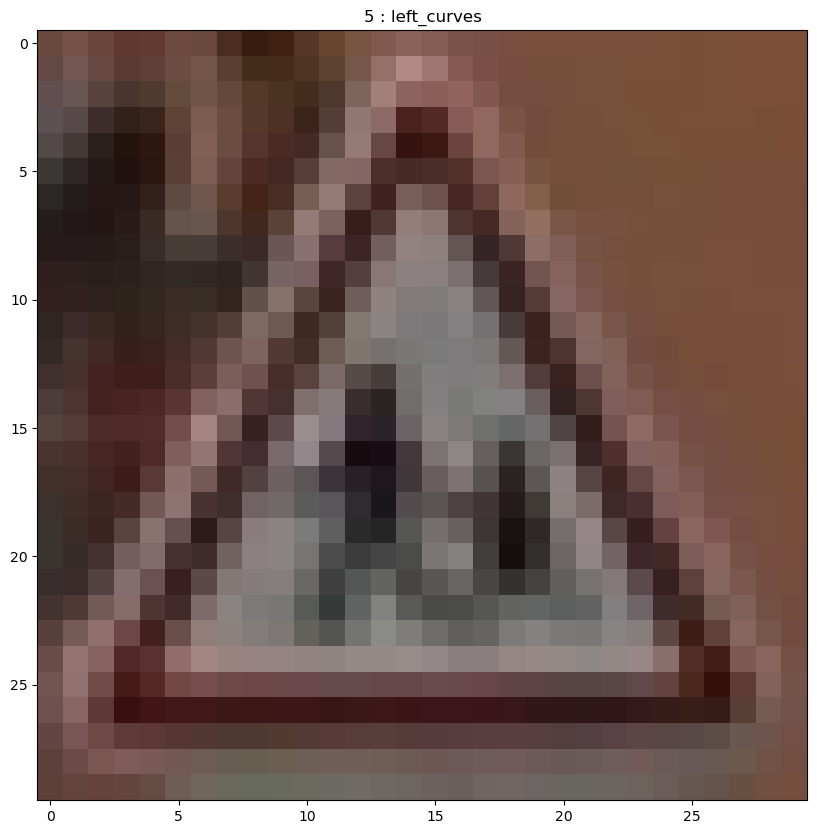

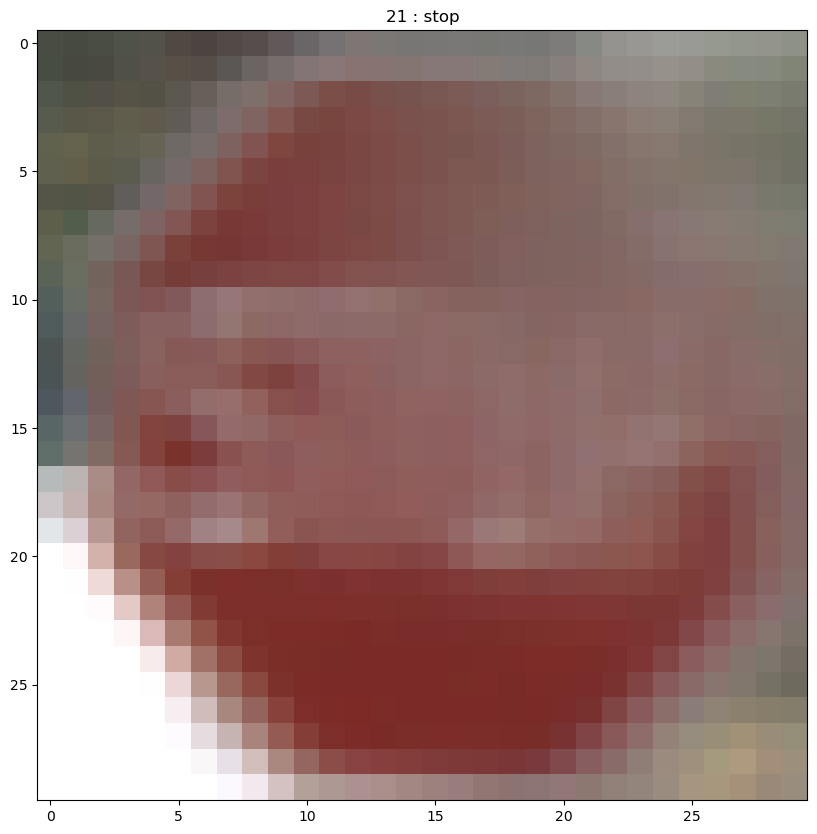

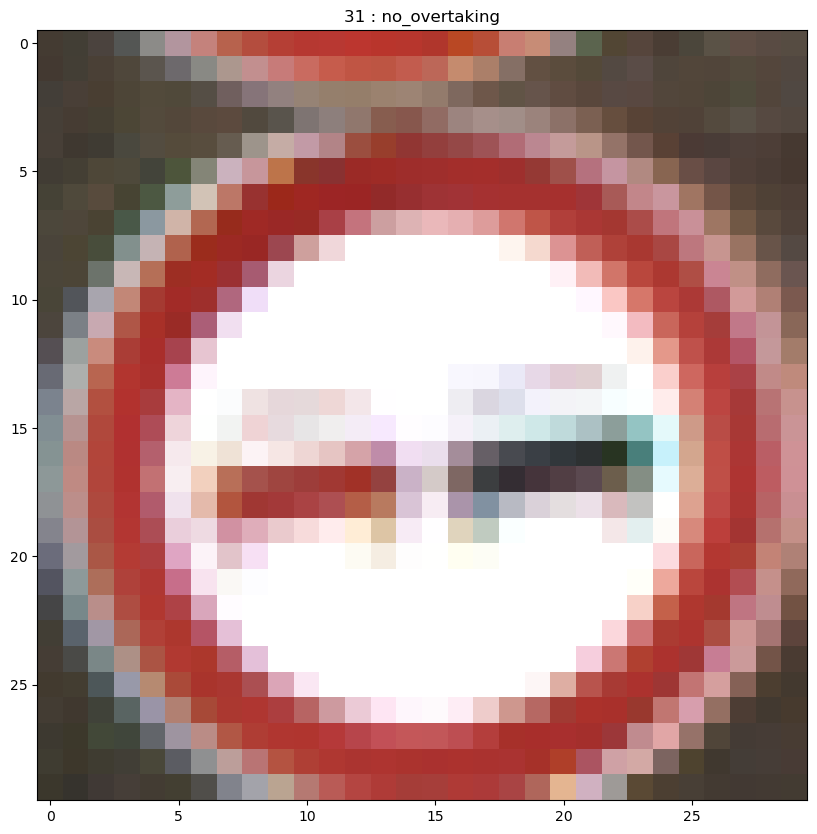

In [12]:
from csv import DictReader

# We will store the data in dict.csv in a dict 

data = {}

with open('dict.csv', 'r') as f:
    d_reader = DictReader(f, fieldnames=["num", "sign"])

    #get fieldnames from DictReader object and store in list
    for row in d_reader:
        data[row['num']] = row['sign']

# We then print the image with num and the sign predicted as a title 
 
for i in range(10): 
    figure(figsize = (10,10))
    imshow(images[i])
    sign = data[str(predictions[i])]
    title(str(predictions[i]) + " : " + str(sign))

In [13]:
from csv import DictWriter

# Here is the code to write the results in a CSV for kaggle 

with open('final.csv', 'w', newline='') as csvfile:
    fieldnames = ['Id', 'Category']
    writer = DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(predictions)): 
        writer.writerow({'Id' : names[i], 'Category' : predictions[i]})

In [14]:
# Here is a code to save all ppm in jpeg in a directory called names (must be created)

# get the path/directory
folder_dir = "eval_kaggle1"

for image in listdir(folder_dir):
    # check if the image ends with ppm
    if (image.endswith(".ppm")):
        img = Image.open(folder_dir + '/' + image)
        img.save("names" + '/' + image.replace('.ppm','.jpg'), format = 'JPEG') 